<a href="https://colab.research.google.com/github/seugminhama/-Univ-data-anaylysis-project/blob/main/%EA%B0%91%EC%83%81%EC%84%A0%EC%95%94_%EC%A7%84%EB%8B%A8_%EB%B6%84%EB%A5%98_%ED%95%B4%EC%BB%A4%ED%86%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = '/content/drive/MyDrive/갑상선암 진단 분류 해커톤/train.csv'
test_path = '/content/drive/MyDrive/갑상선암 진단 분류 해커톤/test.csv'
submission = '/content/drive/MyDrive/갑상선암 진단 분류 해커톤/sample_submission.csv'

In [ ]:
train = pd.read_csv(train_path)

In [ ]:
X = train.drop(columns=['ID', 'Cancer'])
Y = train['Cancer']

In [ ]:
X.head()

,Age,Gender,Country,Race,Family_Background,Radiation_History,Iodine_Deficiency,Smoke,Weight_Risk,Diabetes,Nodule_Size,TSH_Result,T4_Result,T3_Result
0,80,M,CHN,ASN,Positive,Exposed,Sufficient,Non-Smoker,Not Obese,No,0.650355,2.784735,6.744603,2.575820
1,37,M,NGA,ASN,Positive,Unexposed,Sufficient,Smoker,Obese,No,2.950430,0.911624,7.303305,2.505317
2,71,M,CHN,MDE,Positive,Unexposed,Sufficient,Non-Smoker,Not Obese,Yes,2.200023,0.717754,11.137459,2.381080
3,40,F,IND,HSP,Negative,Unexposed,Sufficient,Non-Smoker,Obese,No,3.370796,6.846380,10.175254,0.753023
4,53,F,CHN,CAU,Negative,Unexposed,Sufficient,Non-Smoker,Not Obese,No,4.230048,0.439519,7.194450,0.569356


##데이터 전처리

In [ ]:
X.columns

Index(['Age', 'Gender', 'Country', 'Race', 'Family_Background',
       'Radiation_History', 'Iodine_Deficiency', 'Smoke', 'Weight_Risk',
       'Diabetes', 'Nodule_Size', 'TSH_Result', 'T4_Result', 'T3_Result'],
      dtype='object')

In [ ]:
#인코딩
#dtype -> 'object'
from sklearn.preprocessing import LabelEncoder

categori_feature = [c for c in X.columns if X[c].dtype=='object']

for cate in categori_feature:
  le = LabelEncoder()
  X[cate] = le.fit_transform(X[cate])

In [ ]:
X.head()

,Age,Gender,Country,Race,Family_Background,Radiation_History,Iodine_Deficiency,Smoke,Weight_Risk,Diabetes,Nodule_Size,TSH_Result,T4_Result,T3_Result
0,80,1,1,1,1,0,1,0,0,0,0.650355,2.784735,6.744603,2.575820
1,37,1,7,1,1,1,1,1,1,0,2.950430,0.911624,7.303305,2.505317
2,71,1,1,4,1,1,1,0,0,1,2.200023,0.717754,11.137459,2.381080
3,40,0,4,3,0,1,1,0,1,0,3.370796,6.846380,10.175254,0.753023
4,53,0,1,2,0,1,1,0,0,0,4.230048,0.439519,7.194450,0.569356


In [ ]:
#결측치 확인
print(X.isnull().sum())

Age                  0
Gender               0
Country              0
Race                 0
Family_Background    0
Radiation_History    0
Iodine_Deficiency    0
Smoke                0
Weight_Risk          0
Diabetes             0
Nodule_Size          0
TSH_Result           0
T4_Result            0
T3_Result            0
dtype: int64


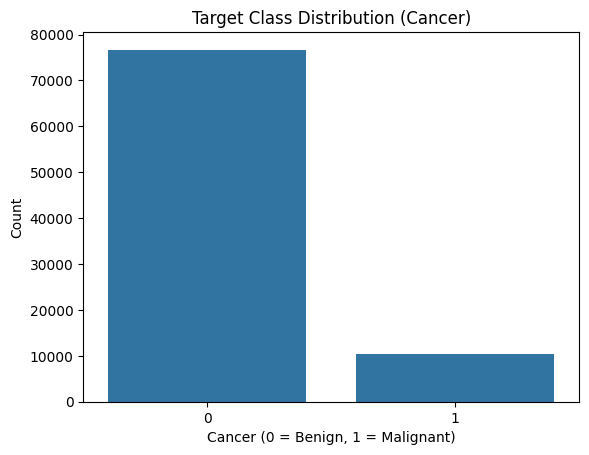

In [ ]:
sns.countplot(x=Y)
plt.title('Target Class Distribution (Cancer)')
plt.xlabel('Cancer (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.show()

In [ ]:
Y.value_counts()

,count
Cancer,
0,76700
1,10459


In [ ]:
#변수 중요도 확인(xgb)
from xgboost import XGBClassifier

In [ ]:
model_temp = XGBClassifier(random_state=42)
model_temp.fit(X, Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
importances = model_temp.feature_importances_
feat_names = X.columns

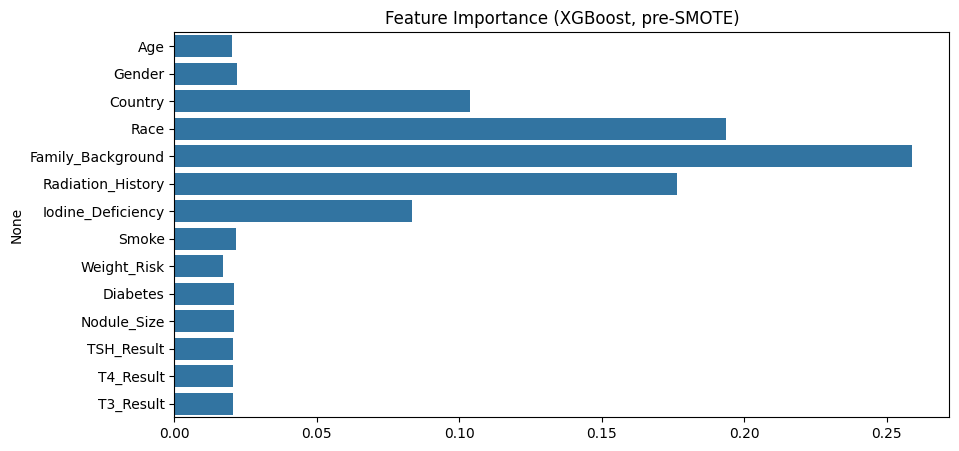

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance (XGBoost, pre-SMOTE)")
plt.show()

In [ ]:
X = X.drop(columns=['Age','Weight_Risk','TSH_Result','T4_Result','T3_Result','Nodule_Size','Smoke','Diabetes','Gender'])

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state=42)

In [ ]:
smote = SMOTE(sampling_strategy=0.5,random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
print("✅ SMOTE 적용 전:", np.bincount(y_train))
print("✅ SMOTE 적용 후:", np.bincount(y_train_sm))

✅ SMOTE 적용 전: [61360  8367]
✅ SMOTE 적용 후: [61360 30680]


##모델링

In [ ]:
!pip install optuna

In [ ]:
#XGBoost
from xgboost import XGBClassifier
import optuna
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
def objective_xgb(trial):
  params = {
      "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
      "max_depth": trial.suggest_int("max_depth", 3, 10),
      "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
      "subsample": trial.suggest_float("subsample", 0.5, 1.0),
      "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
      "gamma": trial.suggest_float("gamma", 0, 5),
      "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
      "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
      "use_label_encoder": False,
      "eval_metric": "logloss",
      "random_state": 42
  }

  model = XGBClassifier(**params)
  model.fit(X_train_sm, y_train_sm)
  preds = model.predict(X_valid)
  return 1.0 - accuracy_score(y_valid, preds)

In [ ]:
study_xgb = optuna.create_study(direction="minimize")
study_xgb.optimize(objective_xgb, n_trials=50)

[I 2025-07-01 03:51:02,047] A new study created in memory with name: no-name-211d7971-8f0b-4864-aa86-c6caee278ab1
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:51:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-07-01 03:51:29,188] Trial 0 finished with value: 0.12006654428636987 and parameters: {'n_estimators': 915, 'max_depth': 8, 'learning_rate': 0.06681366988605204, 'subsample': 0.7189212777437572, 'colsample_bytree': 0.6373599955863805, 'gamma': 1.6298326279010449, 'reg_alpha': 0.5844978050959465, 'reg_lambda': 2.172461719760167}. Best is trial 0 with value: 0.12006654428636987.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:51:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-07-01 03:51:30,619] Trial 1 finished with value: 0.1200665442863698

In [ ]:
best_params = study_xgb.best_params
best_params.update({"random_state": 42, "use_label_encoder": False, "eval_metric": "logloss"})

xgb_best = XGBClassifier(**best_params)
xgb_best.fit(X_train_sm, y_train_sm)
xgb_pred = xgb_best.predict(X_valid)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:53:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
#LightGBM
from lightgbm import LGBMClassifier

In [ ]:
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_sm, y_train_sm)

[LightGBM] [Info] Number of positive: 30680, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21
[LightGBM] [Info] Number of data points in the train set: 92040, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147


LGBMClassifier(random_state=42)

In [ ]:
lgbm_pred = lgbm.predict(X_valid)

In [ ]:
!pip install catboost

In [ ]:
#CatBoost
from catboost import CatBoostClassifier

In [ ]:
def objective_cat(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 1000),
        "depth": trial.suggest_int("depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "random_strength": trial.suggest_float("random_strength", 0.1, 10),
        "verbose": 0
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return 1.0 - accuracy_score(y_valid, preds)

In [ ]:
study_cat = optuna.create_study(direction="minimize")
study_cat.optimize(objective_cat, n_trials=50)

[I 2025-07-01 03:45:20,916] A new study created in memory with name: no-name-f6305f24-b509-4a53-9833-957740697c7c
[I 2025-07-01 03:45:34,385] Trial 0 finished with value: 0.12046810463515378 and parameters: {'iterations': 388, 'depth': 3, 'learning_rate': 0.03142147241086378, 'l2_leaf_reg': 7.682860938286167, 'border_count': 118, 'random_strength': 6.52241514644529}. Best is trial 0 with value: 0.12046810463515378.
[I 2025-07-01 03:45:55,548] Trial 1 finished with value: 0.12006654428636987 and parameters: {'iterations': 671, 'depth': 5, 'learning_rate': 0.220311986131725, 'l2_leaf_reg': 9.959055408957585, 'border_count': 111, 'random_strength': 5.236476056461505}. Best is trial 1 with value: 0.12006654428636987.
[I 2025-07-01 03:46:01,079] Trial 2 finished with value: 0.11943552088113818 and parameters: {'iterations': 266, 'depth': 6, 'learning_rate': 0.1099801273881137, 'l2_leaf_reg': 5.514468320022475, 'border_count': 151, 'random_strength': 5.147298199597329}. Best is trial 2 with 

In [ ]:
best_cat_params = study_cat.best_params
best_cat_params.update({"verbose": 0, "random_state": 42})

cat_best = CatBoostClassifier(**best_cat_params)
cat_best.fit(X_train_sm, y_train_sm)
cat_pred = cat_best.predict(X_valid)

##성능

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print("📌 XGBoost")
print("Accuracy :", accuracy_score(y_valid, xgb_pred))
print("Precision:", precision_score(y_valid, xgb_pred))
print("Recall   :", recall_score(y_valid, xgb_pred))
print("F1-score :", f1_score(y_valid, xgb_pred))

📌 XGBoost
Accuracy : 0.8799334557136301
Precision: 0.4997292907417434
Recall   : 0.44120458891013387
F1-score : 0.46864686468646866


In [ ]:
print("📌 LightGBM")
print("Accuracy :", accuracy_score(y_valid, lgbm_pred))
print("Precision:", precision_score(y_valid, lgbm_pred))
print("Recall   :", recall_score(y_valid, lgbm_pred))
print("F1-score :", f1_score(y_valid, lgbm_pred))

📌 LightGBM
Accuracy : 0.8799334557136301
Precision: 0.4997292907417434
Recall   : 0.44120458891013387
F1-score : 0.46864686468646866


In [ ]:
print("📌 CatBoost")
print("Accuracy :", accuracy_score(y_valid, cat_pred))
print("Precision:", precision_score(y_valid, cat_pred))
print("Recall   :", recall_score(y_valid, cat_pred))
print("F1-score :", f1_score(y_valid, cat_pred))

📌 CatBoost
Accuracy : 0.8799334557136301
Precision: 0.4997292907417434
Recall   : 0.44120458891013387
F1-score : 0.46864686468646866


In [ ]:
model_preds = {
    'XGBoost': xgb_pred,
    'LightGBM': lgbm_pred,
    'CatBoost': cat_pred
}

results = []

for model_name, pred in model_preds.items():
    results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_valid, pred),
        'Precision': precision_score(y_valid, pred),
        'Recall': recall_score(y_valid, pred),
        'F1-score': f1_score(y_valid, pred)
    })

results_df = pd.DataFrame(results).set_index('Model')
display(results_df)

,Accuracy,Precision,Recall,F1-score
Model,,,,
XGBoost,0.879933,0.499729,0.441205,0.468647
LightGBM,0.879933,0.499729,0.441205,0.468647
CatBoost,0.879933,0.499729,0.441205,0.468647


##적용

In [ ]:
test = pd.read_csv(test_path)

In [ ]:
X_test = test.drop(columns=['ID'])

categori_feature = [c for c in X_test.columns if X_test[c].dtype=='object']

for cate in categori_feature:
  le = LabelEncoder()
  X_test[cate] = le.fit_transform(X_test[cate])

In [ ]:
X_test = X_test.drop(columns=['Age','Weight_Risk','TSH_Result','T4_Result','T3_Result','Nodule_Size','Smoke','Diabetes','Gender'])

In [ ]:
xgb_prob = xgb_best.predict_proba(X_test)[:, 1]
lgbm_prob = lgbm.predict_proba(X_test)[:, 1]
cat_prob = cat_best.predict_proba(X_test)[:, 1]

In [ ]:
ensemble_prob = (
    xgb_prob * 0.331 +
    lgbm_prob * 0.334 +
    cat_prob * 0.335
)

In [ ]:
final_preds = (ensemble_prob >= 0.5).astype(int)

In [ ]:
submission_df = pd.read_csv(submission)
submission_df['Cancer'] = final_preds
submission_df.to_csv('/content/drive/MyDrive/갑상선암 진단 분류 해커톤/sample_submission_11.csv', index=False)